In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math

script_R = 3.36*10**3
T = 10
B = 8.86
c_s = math.sqrt(script_R*T)
M = 1.9891*10.0**30 ## kg 
G = 6.67*10.0**(-11)  ## m^3*kg^-1*s^-2

def years_to_seconds(years):
    seconds_per_year = 365.25 * 24 * 3600
    return years * seconds_per_year

def au_to_meters(au):
    au_in_meters = 1.49e11 # meters
    return au * au_in_meters

b
shu_x = np.logspace(-12, np.log10(2), 10000)

shu_integral = np.loadtxt('shuInt.txt')

shu_helper = scipy.interpolate.interp1d(shu_x, shu_integral, kind = 'cubic')

def get_shu_integral(x):
    if x < 10.0**(-12):
        return 0
    if x > 2:
        return shu_helper(2) + 2*(x-2)
    return shu_helper(x)

r_out = 1.974342*10.0**15 # radius in the Shu model with initial enclosed mass equal to one solar mass
##Is this Rmax?

def get_Shu_enclosed_mass(r, t):
    r0 = c_s*t
    centralMass = .975502*c_s**2*r0/G
    Mcalc =  centralMass + r0**3/(G*t**2)*get_shu_integral(r/r0)
    return min(Mcalc, M)

r_values = [10, 100, 1000]

tsec = np.logspace(5, 14, 1000)

for i, r in enumerate([au_to_meters(r_values[i]) for i in [0, 1, 2]]):
    t = [tsec[i] for i in range(len(tsec))]
    M_values = np.zeros(len(t))
    for j in range(0, len(t)):
        M_values[j] = get_Shu_enclosed_mass(r, t[j]) #kg
    plt.plot(t, M_values, label=f'r = {r_values[i]} AU')


plt.xlabel('t(s)', fontsize = 10)
plt.ylabel('$M_{enc}(kg)$', fontsize = 10)
plt.legend(fontsize = 10)
plt.xscale('log')
plt.yscale('log')
plt.show()


NameError: name 'b' is not defined

In [3]:
r = au_to_meters(10)
t = 10**5
r0 = c_s*t
centralMass = .975502*c_s**2*r0/G
Mcalc =  centralMass + r0**3/(G*t**2)*get_shu_integral(r/r0)
print(r0)
print(centralMass)
print(Mcalc)
print(G)
print(r/10**10)
print(r/r0)
print(get_shu_integral(r/r0))

NameError: name 'get_shu_integral' is not defined

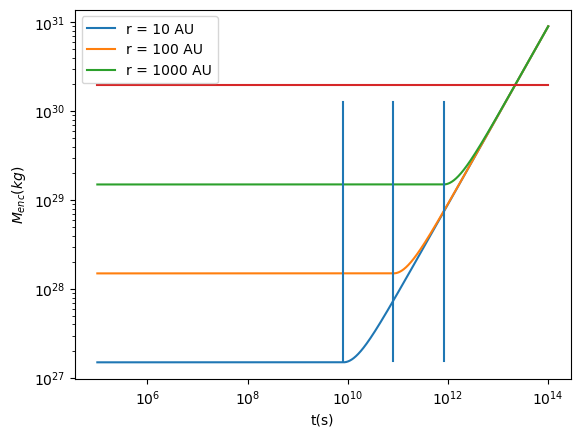

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import interpolate
from scipy.optimize import brentq
import h5py
import math
import rebound
import sys
import time
script_R = 3.36*10**3
T = 10 ##Kelvin
B = 8.86
c_s = math.sqrt(script_R*T)
M = 1.9891*10.0**30 ## kg 
G = 6.674*10.0**(-11)  ## m^3*kg^-1*s^-2
a = 0.975471932310942752606143078377
b = 0.975502

def years_to_seconds(years):
    seconds_per_year = 365.25 * 24 * 3600
    return years * seconds_per_year

def au_to_meters(au):
    au_in_meters = 1.49e11 # meters
    return au * au_in_meters

def meters_to_au(au):
    au_in_meters = 1.49e11 # meters
    return au / au_in_meters

rmax = meters_to_au((G*M)/(2*c_s**2))


v_x = np.logspace(-12, np.log10(2), 10000)

v_integral = np.loadtxt('shuInt.txt')

IntHelper = scipy.interpolate.interp1d(v_x, v_integral, kind = 'cubic')

def get_x_integral(x):
    if x < 10.0**(-12):
        return 0
    if x > 2:
        return IntHelper(2) + 2*(x-2)
    return IntHelper(x)


def Mp(t):
    return (a * c_s**3 * t)/G 

def getMenc(r, t):
    x = r/(c_s*t)
    integral = get_x_integral(x)
    return (t*c_s**3/G)*integral

def Mtot(r, t):
    r0 = c_s*t
    centralMass = .975502*c_s**2*r0/G
    Mcalc =  centralMass + r0**3/(G*t**2)*get_x_integral(r/r0)
    return Mcalc

r_values = [10, 100, 1000]

tsec = np.logspace(5, 14, 1000)

for i, r in enumerate([au_to_meters(r_values[i]) for i in [0, 1, 2]]):
    t = [tsec[i] for i in range(len(tsec))]
    M_values = np.zeros(len(t))
    for j in range(0, len(t)):
        M_values[j] = Mtot(r, t[j]) 
    plt.plot(t, M_values, label=f'r = {r_values[i]} AU')

plt.axvline(au_to_meters(10)/c_s, ymin=0.05, ymax = 0.75)
plt.axvline(au_to_meters(100)/c_s, ymin=0.05, ymax = 0.75)
plt.axvline(au_to_meters(1000)/c_s, ymin=0.05, ymax = 0.75)
plt.plot(tsec, [M for i in range(len(tsec))])
plt.xlabel('t(s)', fontsize = 10)
plt.ylabel('$M_{enc}(kg)$', fontsize = 10)
plt.legend(fontsize = 10)
plt.xscale('log')
plt.yscale('log')
plt.show()

It was a problem with the units and the handling of the conditions in the $\verb|get_x_integral(x)|$ function

In [5]:
r = au_to_meters(10)
t = 10**5
r0 = c_s*t
centralMass = .975502*c_s**2*r0/G
Mcalc =  centralMass + r0**3/(G*t**2)*get_x_integral(r/r0)
print(r0)
print(centralMass)
print(Mcalc)
print(G)
print(r/r0)
print(get_x_integral(r/r0))

18330302.77982336
9.002246028619433e+21
1.5002697036800343e+27
6.674e-11
81286.16411290716
162571.3527621413


In [6]:
c_s

183.3030277982336

In [7]:
get_x_integral(10)

19.0245363269572

In [32]:
captured = []

with open('captured_particles.txt', 'r') as file:
    for line in file:
        number = int(line.split()[1])
        captured.append(number)

print(captured)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

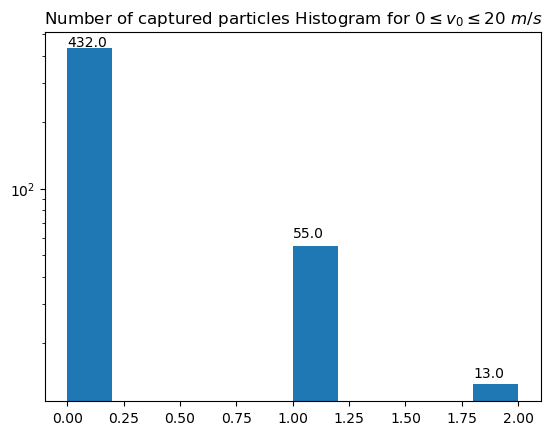

In [64]:
import matplotlib.pyplot as plt
plt.title('Number of captured particles Histogram for $0 \\leq v_0 \\leq 20 \\ m/s$')
plt.yscale('log')
n, bins, patches = plt.hist(captured, bins = 'auto')

plt.text(bins[0], n[0]+10, f'{n[0]}')
plt.text(bins[5], n[5]+5, f'{n[5]}')
plt.text(bins[9], n[9]+1, f'{n[9]}')

plt.show()

363


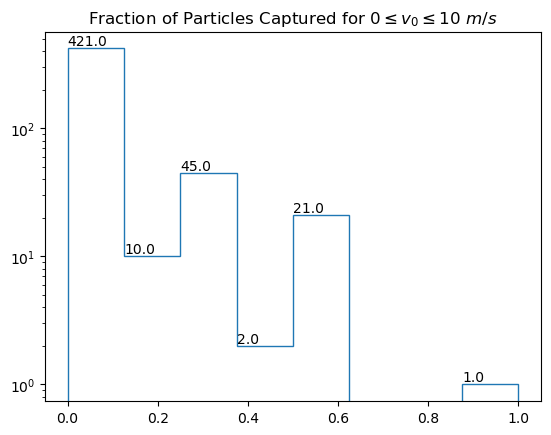

In [34]:
import matplotlib.pyplot as plt
inputtxt = []
capturedtxt = []

with open('captured_particles.txt', 'r') as file:
    lines = file.readlines()

for i in range(len(lines)):
    if 'Entered' in lines[i]:
        inputtxt.append(int(lines[i].split()[1]))
        capturedtxt.append(int(lines[i-1].split()[1]))

capturedfrac = []

for i in range(len(inputtxt)):
    if inputtxt[i] == 0 or capturedtxt[i] == 0:
        capturedfrac.append(0)
    else:
        capturedfrac.append(capturedtxt[i]/inputtxt[i])

for i in range(len(capturedfrac)):
    if capturedfrac[i] > 1:
        print(i)
        capturedfrac[i] = 1

plt.yscale('log')
n, bins, patches = plt.hist(capturedfrac, bins = 8, histtype = 'step')

for i in range(len(bins)-1):
    if n[i] > 0 :
        plt.text(bins[i], n[i] + 0.05 * n[i], f'{n[i]}')

plt.title('Fraction of Particles Captured for $0\\leq v_0 \\leq 10 \\ m/s$')
plt.show()

In [35]:
import numpy as np
np.mean(inputtxt)

1.946

For this run above, I used $b = \sqrt{b_{max}^2*\verb|np.random.random()|}$. I also ran it placing the particles at different angles around the radius of $R_{max}$, as we were doing before. On average, only about 4-7 particles were inserted per run. 

Number Density of planetesimals outside the cloud $n_0$

On average capture use $N$, then the volume captured from satisfies 

$$Vn_0 =N$$

$$V = N/n_0$$

$$\sigma = \pi b_{max}^2$$

$$v_i = v_0$$

$$\dfrac{dV}{dt} = \sigma v_0$$

$$\dfrac{dN}{dt}=n_0 \dfrac{dV}{dt}$$

38-40 (for homogenous case)

$\dot{R}$ can be zero for our case.

Recreate plots on pages 9 and 10 with both $\verb|testparticle.py|$ and $\verb|Shu.py|$ in order to compare the scripts and make sure they're correct.

Sometimes particle is added depending on $\verb|N_exp| $

In [5]:
import h5py
import pandas as pd
import glob

h5_files = glob.glob('testpartout*.h5')

sims = []

for file in h5_files:
    with h5py.File(file, 'r') as h5f:
        data = {dataset_name: h5f[dataset_name][:] for dataset_name in h5f}
        df = pd.DataFrame(data)
        sims.append(df)


simtotal = pd.concat(sims, ignore_index=True)


display(simtotal)



ValueError: No objects to concatenate

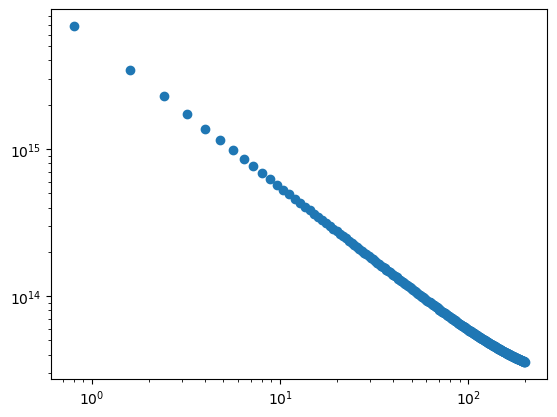

In [34]:
import matplotlib.pyplot as plt

plt.scatter(simtotal['InitialVelocity'] ,simtotal['CaptureVolume'] );
plt.yscale('log')
plt.xscale('log')
plt.show()

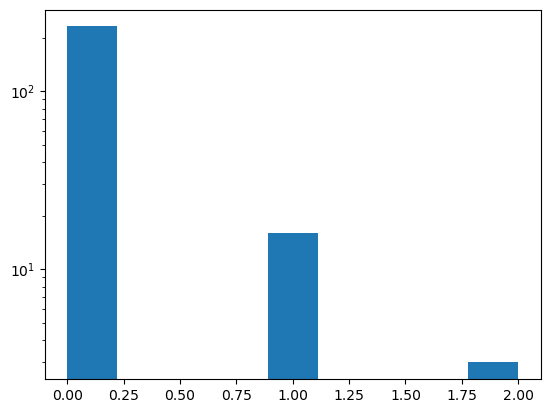

In [42]:
capturedfraction = []

for i in range(len(simtotal['Entered'])):
    if simtotal['Entered'][i] == 0:
        capturedfraction.append(0)
    else:
        capturedfraction.append(simtotal['Ncaptured'][i]/simtotal['Entered'][i])


#print(capturedfraction)
plt.hist(simtotal['Ncaptured'], bins = 'auto')
plt.yscale('log')
plt.show()

$$f = \dfrac{1}{t_f} = n_0v_0\pi b_{max}^2$$

$$n_0 = \dfrac{1}{\pi t_f v_0 b_{max}^2}$$

$$V = \dfrac{N_{capt}}{n_0} \tag{Can just use this case.}$$

Here, $f$ is $\dot{N}_{static}$ 


Can just use 

$\verb|b = np.logspace(9, 17, 80)|$ 

$$
\verb|for i in range(0, 80):| \\
    \verb|submit_job(bmin = b[i], bmax = b[i+1])|
$$



Write third script to calculate the capture volume after all the simulations have been run. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
simulationdat = pd.read_csv('shusimulation.csv')
#simulationdat = simulationdat.drop(columns=['Unnamed: 0'])

simulationdat


,ImpactParameter,Entered,InitialVelocity,Ncaptured,CapturedVolume
0,[],0,0.2,0,0.0
1,[5.3208993e+17],1,0.4,0,0.0
2,[],0,0.6,0,0.0
3,[],0,0.8,0,0.0
4,[2.9215897e+17],1,1.0,0,0.0
...,...,...,...,...,...
995,[2.0208543e+15],1,199.2,0,0.0
996,[],0,199.4,0,0.0
997,[6.9281312e+14 3.4381154e+15 2.6772279e+15],3,199.6,0,0.0
998,[4.0228784e+15],1,199.8,0,0.0


In [1]:
import matplotlib.pyplot as plt

v0vals = simulationdat['InitialVelocity'][simulationdat['CapturedVolume'] != 0]
captv = simulationdat['CapturedVolume'][simulationdat['CapturedVolume'] != 0]
plt.yscale('log')
plt.xscale('log')
plt.plot(v0vals, captv)
plt.show()

NameError: name 'simulationdat' is not defined

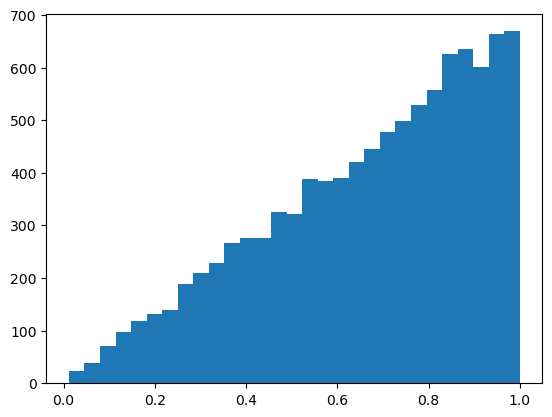

In [57]:
from numpy import random
randomvar = []
for i in range(int(1e4)):
    randomvar.append(np.sqrt(np.random.random()))

plt.hist(randomvar, bins = 'auto')
plt.show()

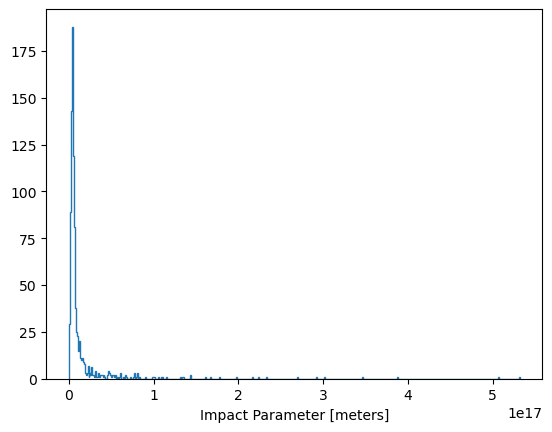

In [61]:
import numpy as np
import matplotlib.pyplot as plt

bvals = []

for i in range(len(simulationdat['ImpactParameter'])):
    b_str = simulationdat['ImpactParameter'][i]
    cleaned_b = b_str.strip('[]').replace(',', '').split()
    for val in cleaned_b:
        if val:
            bvals.append(float(val))

plt.hist(bvals, histtype = 'step' ,bins='auto')
#plt.xscale('log')
plt.xlabel('Impact Parameter [meters]')
plt.show()


In [69]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import interpolate
from scipy.optimize import brentq
import h5py
import math
import rebound
import sys
import time
script_R = 3.36*10**3
T = 10 ##Kelvin
B = 8.86
c_s = math.sqrt(script_R*T)
M = 1.989*10.0**30 ## kg 
G = 6.674*10.0**(-11)  ## m^3*kg^-1*s^-2
a = 0.975471932310942752606143078377
v_x = np.logspace(-6, 4, 10000)
v_integral = np.loadtxt('shuInt.txt')

IntHelper = scipy.interpolate.interp1d(v_x, v_integral, kind = 'cubic')

def get_x_integral(x):
    if x < 10.0**(-6):
        return 0
    if x > 2:
        return IntHelper(2) + 2*(x-2)
    return IntHelper(x)

def Mtot(r, t):
    r0 = c_s*t
    centralMass = .975502*c_s**2*r0/G
    Mcalc =  centralMass + r0**3/(G*t**2)*get_x_integral(r/r0)
    return min(Mcalc, M)

def getr_max(t):
    return scipy.optimize.brentq(lambda r: (Mp(t)+getMenc(r, t)-2*10**30), .4, 20000)

def getPhi(r, t):
    rmax = (G*M)/(2*c_s**2)
    phi_max = -G*M/rmax
    r_meters = r
    if r >= rmax:
        return -G*M/r_meters
    else:
        return phi_max - G*trapIntegrateLog(lambda rp: (Mtot(rp, t))/rp**2, r_meters, rmax, 10000)

def get_bmax(R, v0, t):
    phi = getPhi(R, t)
    return R*math.sqrt(1-2*phi/v0**2)

np.pi*get_bmax((G*M)/(2*c_s**2), 1.2, 350000*3.154e7)**2*1.2*350000*3.154e7

1.51567367147276e+49

- Check to see how many particles are entering $r<r_0$.

- Is the change in energy zero for everything that isn't captured?
    - Check how the energy behaves.
 